<a href="https://colab.research.google.com/github/Skamath3/testrepo/blob/main/IndianDiabeticDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

Saving diabetes.csv to diabetes (2).csv


{'diabetes.csv': b'Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome\r\n6,148,72,35,0,33.6,0.627,50,1\r\n1,85,66,29,0,26.6,0.351,31,0\r\n8,183,64,0,0,23.3,0.672,32,1\r\n1,89,66,23,94,28.1,0.167,21,0\r\n0,137,40,35,168,43.1,2.288,33,1\r\n5,116,74,0,0,25.6,0.201,30,0\r\n3,78,50,32,88,31,0.248,26,1\r\n10,115,0,0,0,35.3,0.134,29,0\r\n2,197,70,45,543,30.5,0.158,53,1\r\n8,125,96,0,0,0,0.232,54,1\r\n4,110,92,0,0,37.6,0.191,30,0\r\n10,168,74,0,0,38,0.537,34,1\r\n10,139,80,0,0,27.1,1.441,57,0\r\n1,189,60,23,846,30.1,0.398,59,1\r\n5,166,72,19,175,25.8,0.587,51,1\r\n7,100,0,0,0,30,0.484,32,1\r\n0,118,84,47,230,45.8,0.551,31,1\r\n7,107,74,0,0,29.6,0.254,31,1\r\n1,103,30,38,83,43.3,0.183,33,0\r\n1,115,70,30,96,34.6,0.529,32,1\r\n3,126,88,41,235,39.3,0.704,27,0\r\n8,99,84,0,0,35.4,0.388,50,0\r\n7,196,90,0,0,39.8,0.451,41,1\r\n9,119,80,35,0,29,0.263,29,1\r\n11,143,94,33,146,36.6,0.254,51,1\r\n10,125,70,26,115,31.1,0.205,41,1\r\n7,147,76,0,0,39.4,0.257,43

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns
from plotnine import *

dF=pd.read_csv('diabetes.csv') #reading Dataset
dF.shape

#firstgraph
# Age=['16-20','21-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','65-70'] #Age of patient
# Frequency=[2,4,6,8,10,12,14,16,18,20,22] #Number of patient affected as per age range


# plt.bar(ageclub,BloodPressure,width=0.2,color=['red'])
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.title('Diabetes Age Graph')
# plt.show()

(768, 9)

In [ ]:
dF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
dF[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = dF[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.nan)
dF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
dF['Insulin'].fillna(dF['Insulin'].median(),inplace=True)
dF['BloodPressure'].fillna(dF['BloodPressure'].median(),inplace=True)
dF['Glucose'].fillna(dF['Glucose'].median(),inplace=True)
dF['SkinThickness'].fillna(dF['SkinThickness'].median(),inplace=True)
dF['BMI'].fillna(dF['BMI'].median(),inplace=True)
dF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


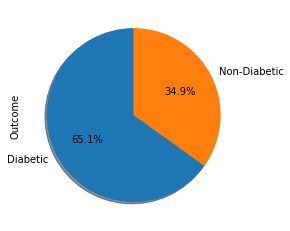

In [ ]:
labels = 'Diabetic', 'Non-Diabetic'

dF.Outcome.value_counts().plot.pie(labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcf09a9d6a0>,
      dtype=object)

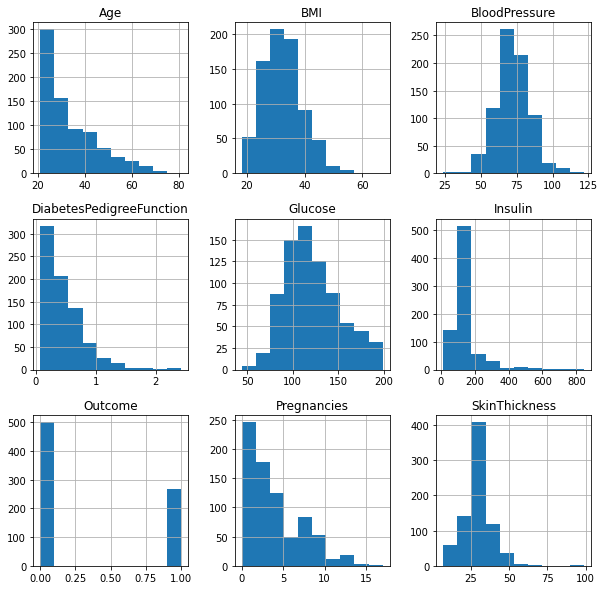

In [ ]:
dF.hist(figsize=(10,10))

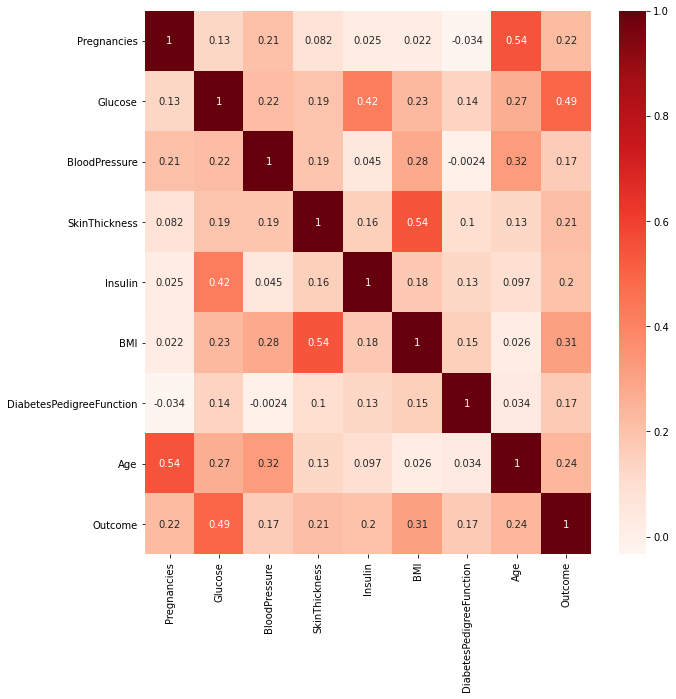

In [ ]:
pearsonCorelation = pd.DataFrame.corr(dF,method='pearson')
pearsonCorelation
plt.figure(figsize=(10,10))
sns.heatmap(pearsonCorelation, annot= True, cmap = 'Reds')

In [ ]:
#https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python
bins = [18, 30, 40, 50, 60, 70, 120]
labels = ['18-29', '30-39', '40-49', '50-59', '60-69', '70+']
dF['AgeRange'] = pd.cut(dF.Age, bins, labels = labels,include_lowest = True)
dF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,AgeRange
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1,40-49
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0,30-39
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1,30-39
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0,18-29
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1,30-39


In [ ]:
data1=dF[dF['Outcome']==1].groupby('AgeRange')[['Outcome']].count()
data1['TotalNumber'] = dF.groupby('AgeRange')[['Outcome']].count()
data1['ResultOfDiabetic %'] =  (data1['Outcome']/data1['TotalNumber'])*100
data1.head()

,Outcome,TotalNumber,ResultOfDiabetic %
AgeRange,,,
18-29,90,417,21.582734
30-39,76,157,48.407643
40-49,64,113,56.637168
50-59,31,54,57.407407
60-69,7,25,28.000000


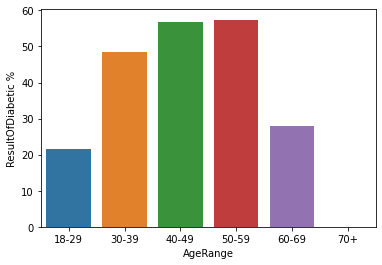

In [ ]:
sns.barplot(data1.index,data1['ResultOfDiabetic %'])

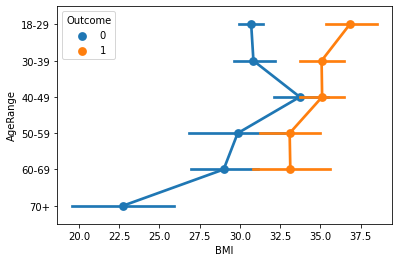

In [ ]:
sns.pointplot(dF['BMI'], dF['AgeRange'], hue=dF['Outcome'])

<Figure size 360x360 with 0 Axes>

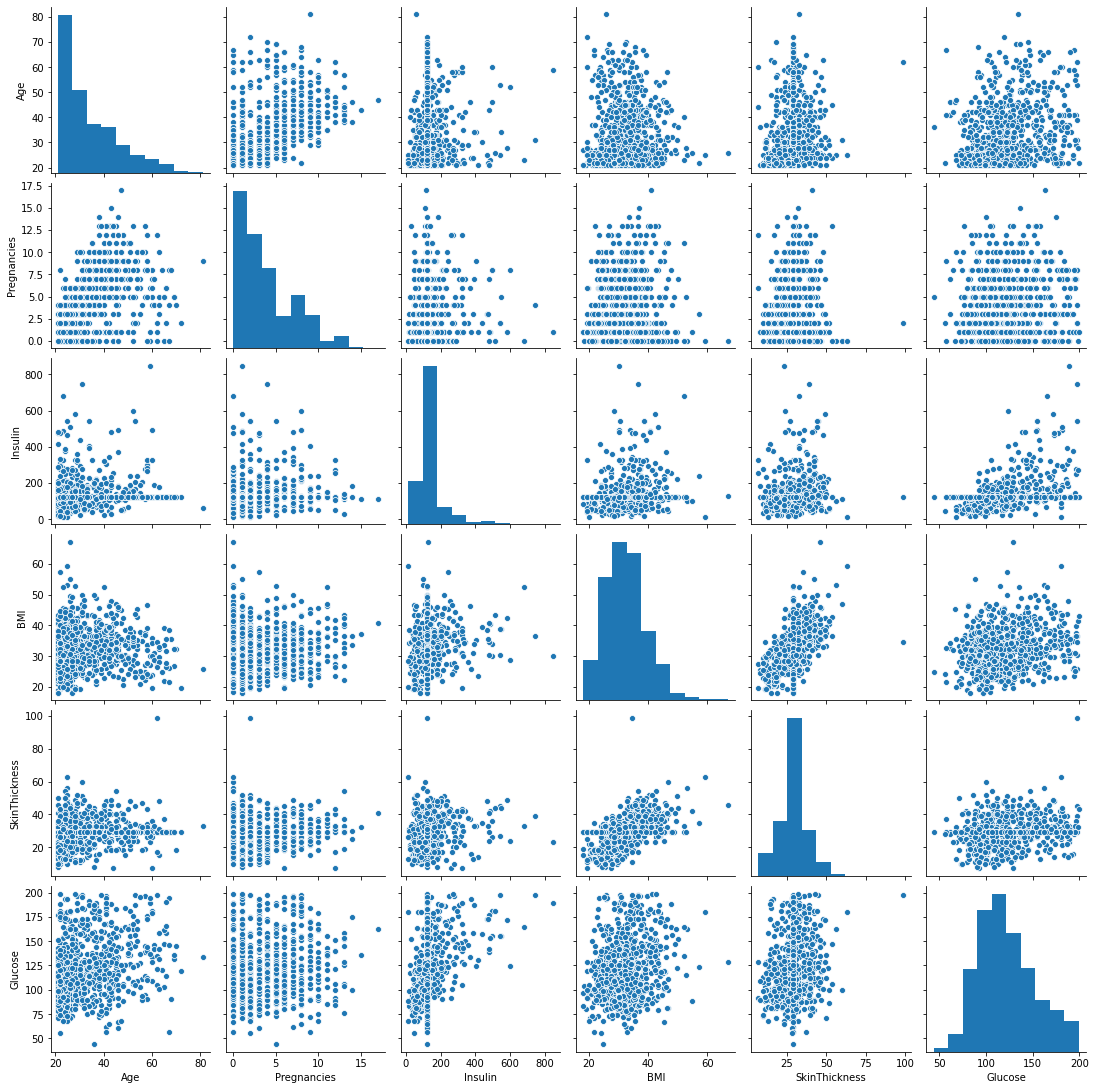

In [ ]:
plt.figure(figsize=(5,5))
sns.pairplot(dF[['Age','Pregnancies','Insulin','BMI','SkinThickness','Glucose']])

/usr/local/lib/python3.6/dist-packages/plotnine/stats/smoothers.py:168: PlotnineWarning: Confidence intervals are not yet implementedfor lowess smoothings.
  "for lowess smoothings.", PlotnineWarning)


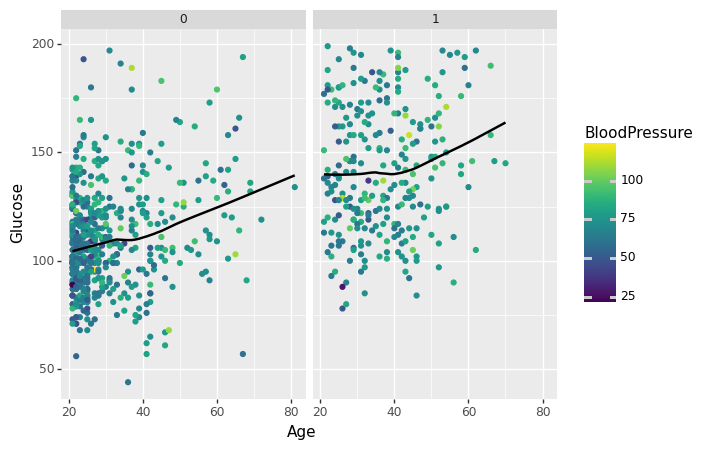

<ggplot: (8782948495536)>

In [ ]:
ggplot(dF,aes(x='Age',y='Glucose',colour='BloodPressure'))+geom_point()+stat_smooth()+facet_wrap('~Outcome')